<a href="https://colab.research.google.com/github/PabAleBravo/Proyectointegradorequipo14/blob/main/Avance3_Equipo14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

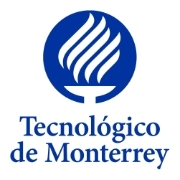


# Avance 3. Baseline

## Equipo 14

### A01793024 – Pablo Alejandro Bravo Vargas
### A00939319 - Brian Sánchez Hernández
### A00968460 - Josías Ruiz Peña


## Estructura de datos

Los datos se encuentran divididos en 12 archivos .xlsx ubicados en un repositorio en Github, por lo que se requiere concatenarlos en un DataFrame para llevar a cabo la exploración de datos.

Importar Datos del archivo de muestra de la información para su análisis.

In [ ]:
#Librerias

import pandas as pd
import chardet
#pip install plotly
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
!pip install lifelines
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE


In [ ]:
#Extracción de los datos

url_archivo1 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2301_Base%20Flujo.xlsx'
url_archivo2 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2302_Base%20Flujo.xlsx'
url_archivo3 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2303_Base%20Flujo.xlsx'
url_archivo4 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2304_Base%20Flujo.xlsx'
url_archivo5 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2305_Base%20Flujo.xlsx'
url_archivo6 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2306_Base%20Flujo.xlsx'
url_archivo7 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2307_Base%20Flujo.xlsx'
url_archivo8 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2308_Base%20Flujo.xlsx'
url_archivo9 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2309_Base%20Flujo.xlsx'
url_archivo10 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2310_Base%20Flujo.xlsx'
url_archivo11 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2311_Base%20Flujo.xlsx'
url_archivo12 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2312_Base%20Flujo.xlsx'

# Cargando el archivo
df_archivo1 = pd.read_excel(url_archivo1)
df_archivo2 = pd.read_excel(url_archivo2)
df_archivo3 = pd.read_excel(url_archivo3)
df_archivo4 = pd.read_excel(url_archivo4)
df_archivo5 = pd.read_excel(url_archivo5)
df_archivo6 = pd.read_excel(url_archivo6)
df_archivo7 = pd.read_excel(url_archivo7)
df_archivo8 = pd.read_excel(url_archivo8)
df_archivo9 = pd.read_excel(url_archivo9)
df_archivo10 = pd.read_excel(url_archivo10)
df_archivo11 = pd.read_excel(url_archivo11)
df_archivo12 = pd.read_excel(url_archivo12)

# Concatenarlo

df = pd.concat([df_archivo1, df_archivo2, df_archivo3, df_archivo4, df_archivo5, df_archivo6, df_archivo7, df_archivo8, df_archivo9, df_archivo10, df_archivo11, df_archivo12])

df.head()

,Expediente,Tiposervicio,Servicio,SubServicio,EstatusExp,FechaApertura,FechaAsignacion,Fechallegada,EntidadOrigen,MunicipioOrigen,...,LatitudExp,LongitudExp,CP,dsTipoAuto,Cl Proveedor,Fecha_AsisConcluida,Fecha_Termino,Fecha_RegisPago,FechasRegisFactura,EstatusCXP
0,18971034,EMERGENCIA,Asistencia Vial,Cambio de Llanta,Cancelado al Momento,2023-01-31,NaT,NaT,NUEVO LEON,SAN NICOLAS DE LOS GARZA,...,25.741215,-100.250260,66440.0,Rio Sedan,0,NaT,NaT,NaT,NaT,NaN
1,18971033,PAGO DIRECTO (POR CUENTAS),Siniestros,Grúas por Colisión,Concluido,2023-01-31,2023-02-01,2023-02-01,PUEBLA,AMOZOC,...,NaN,NaN,NaN,NaN,12325,NaT,NaT,NaT,NaT,NaN
2,18971032,PAGO DIRECTO (POR CUENTAS),Siniestros,Grúas por Colisión,Concluido,2023-01-31,2023-02-01,2023-02-01,PUEBLA,AMOZOC,...,NaN,NaN,NaN,NaN,12325,NaT,NaT,NaT,NaT,NaN
3,18971029,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-01-31,2023-01-31,2023-02-01,BAJA CALIFORNIA,ENSENADA,...,31.902156,-116.576906,22813.0,VERSA,11890,2023-02-01,2023-02-01,NaT,2023-02-28,FACTURADO
4,18971028,CONEXION,Asistencia Vial,Arrastre de Grúa,Cancelado al Momento,2023-01-31,NaT,NaT,MEXICO,ECATEPEC DE MORELOS,...,19.622923,-99.046570,55024.0,500 Abarth,0,NaT,NaT,NaT,NaT,NaN


Guardar DataSet combiando a un archivo facilmente importable.

In [ ]:
df.to_csv('/content/2023_Dataset.csv', index=False)

Forma del dataset

In [ ]:
rows, columns = df.shape
print(f'El dataset contiene {rows} registros y {columns} columnas.')

El dataset contiene 491281 registros y 37 columnas.


Análisis descriptivo

In [ ]:
print(df.describe())
print(df.describe(include=['object']))

         Expediente          Costo    CostoPagado       clCuenta  \
count  4.912810e+05  491281.000000  410918.000000  491281.000000   
mean   1.927413e+07    1181.533402    1224.947553    1820.570248   
std    2.127142e+05    2842.302096    2887.321078     754.435343   
min    1.891442e+07       0.000000       0.000000       7.000000   
25%    1.908687e+07     220.000000     300.000000    1213.000000   
50%    1.927282e+07     550.000000     570.000000    1796.000000   
75%    1.945871e+07    1130.930000    1149.750000    2585.000000   
max    1.964661e+07  195000.000000  195000.000000    2866.000000   

           TieneCita  ProveedorAsignado  CntMonitoreosAProveedor  \
count  491281.000000      491281.000000            491281.000000   
mean        0.035933           0.838683                 1.802046   
std         0.186122           0.367824                 2.095909   
min         0.000000           0.000000                 0.000000   
25%         0.000000           1.000000        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491281 entries, 0 to 41799
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Expediente               491281 non-null  int64         
 1   Tiposervicio             491281 non-null  object        
 2   Servicio                 491281 non-null  object        
 3   SubServicio              491281 non-null  object        
 4   EstatusExp               491281 non-null  object        
 5   FechaApertura            491281 non-null  datetime64[ns]
 6   FechaAsignacion          412029 non-null  datetime64[ns]
 7   Fechallegada             381928 non-null  datetime64[ns]
 8   EntidadOrigen            455808 non-null  object        
 9   MunicipioOrigen          455808 non-null  object        
 10  Costo                    491281 non-null  float64       
 11  CostoPagado              410918 non-null  float64       
 12  lugardelevento   

In [ ]:
# Calculando la cardinalidad de las variables
cardi = df.columns
for i in cardi:
  cardinality = df[i].nunique()
  print(f"Cardinalidad de {i}: {cardinality}")


Cardinalidad de Expediente: 491281
Cardinalidad de Tiposervicio: 15
Cardinalidad de Servicio: 2
Cardinalidad de SubServicio: 11
Cardinalidad de EstatusExp: 5
Cardinalidad de FechaApertura: 365
Cardinalidad de FechaAsignacion: 386
Cardinalidad de Fechallegada: 384
Cardinalidad de EntidadOrigen: 33
Cardinalidad de MunicipioOrigen: 1880
Cardinalidad de Costo: 33153
Cardinalidad de CostoPagado: 27657
Cardinalidad de lugardelevento: 3
Cardinalidad de EstatusProv: 4
Cardinalidad de dsBlindaje: 6
Cardinalidad de ClasificaAuto: 6
Cardinalidad de CitaProg: 2
Cardinalidad de dsTipoAsignacion: 6
Cardinalidad de importeprov: 2
Cardinalidad de Entidaddestino: 34
Cardinalidad de Municipiodestino: 1346
Cardinalidad de clCuenta: 243
Cardinalidad de TieneCita: 2
Cardinalidad de ProveedorAsignado: 2
Cardinalidad de CntMonitoreosAProveedor: 40
Cardinalidad de EspecifiqueCarga: 12607
Cardinalidad de dsMarcaAuto: 73
Cardinalidad de LatitudExp: 423243
Cardinalidad de LongitudExp: 385454
Cardinalidad de CP: 

## Análisis univariante

Para entender las características de las variables más importantes.

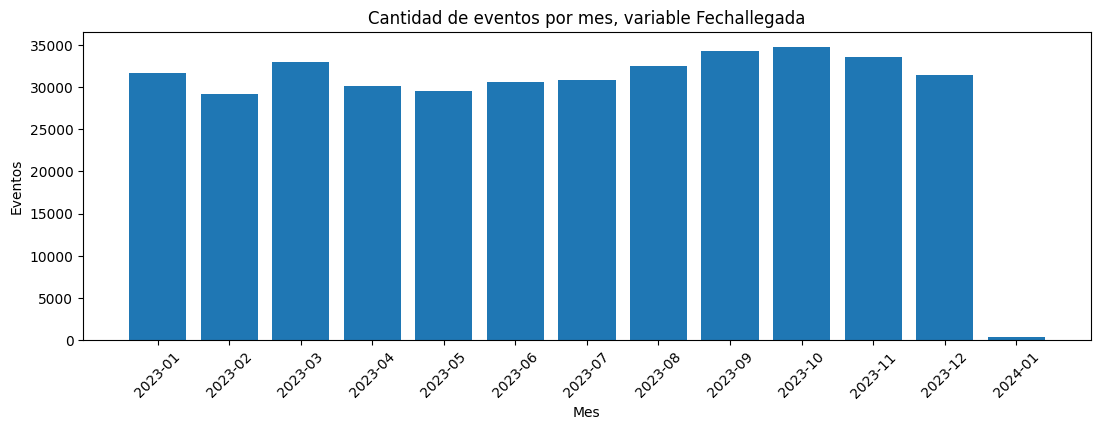

In [ ]:

# Visualizando la cantidad de eventos por día de variable Fechallegada
monthly_counts = df['Fechallegada'].dt.to_period('M').value_counts().sort_index()
xs = monthly_counts.index
ys = monthly_counts.values
xss = xs.astype(str)
plt.figure(figsize=(13, 4))
plt.bar(xss, ys)
plt.xlabel('Mes')
plt.ylabel('Eventos')
plt.title('Cantidad de eventos por mes, variable Fechallegada')
plt.xticks(rotation=45)
plt.show()


count    410918.000000
mean       1224.947553
std        2887.321078
min           0.000000
25%         300.000000
50%         570.000000
75%        1149.750000
max      195000.000000
Name: CostoPagado, dtype: float64


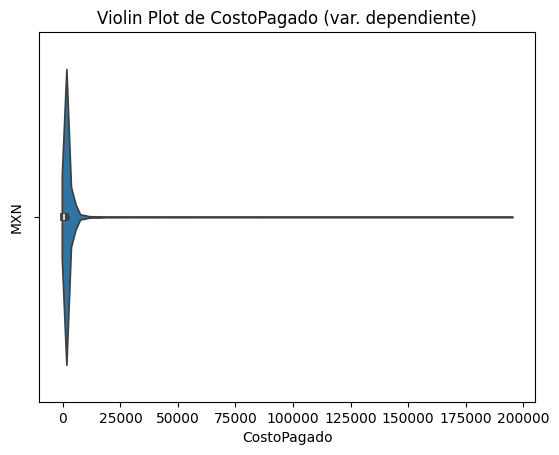

In [ ]:
# Análisis descriptivo de la variable CostoPagado
description = df.CostoPagado.describe()
print(description)
sns.violinplot(data=df.CostoPagado, orient="h")
plt.title('Violin Plot de CostoPagado (var. dependiente)')
plt.ylabel('MXN')

plt.show()

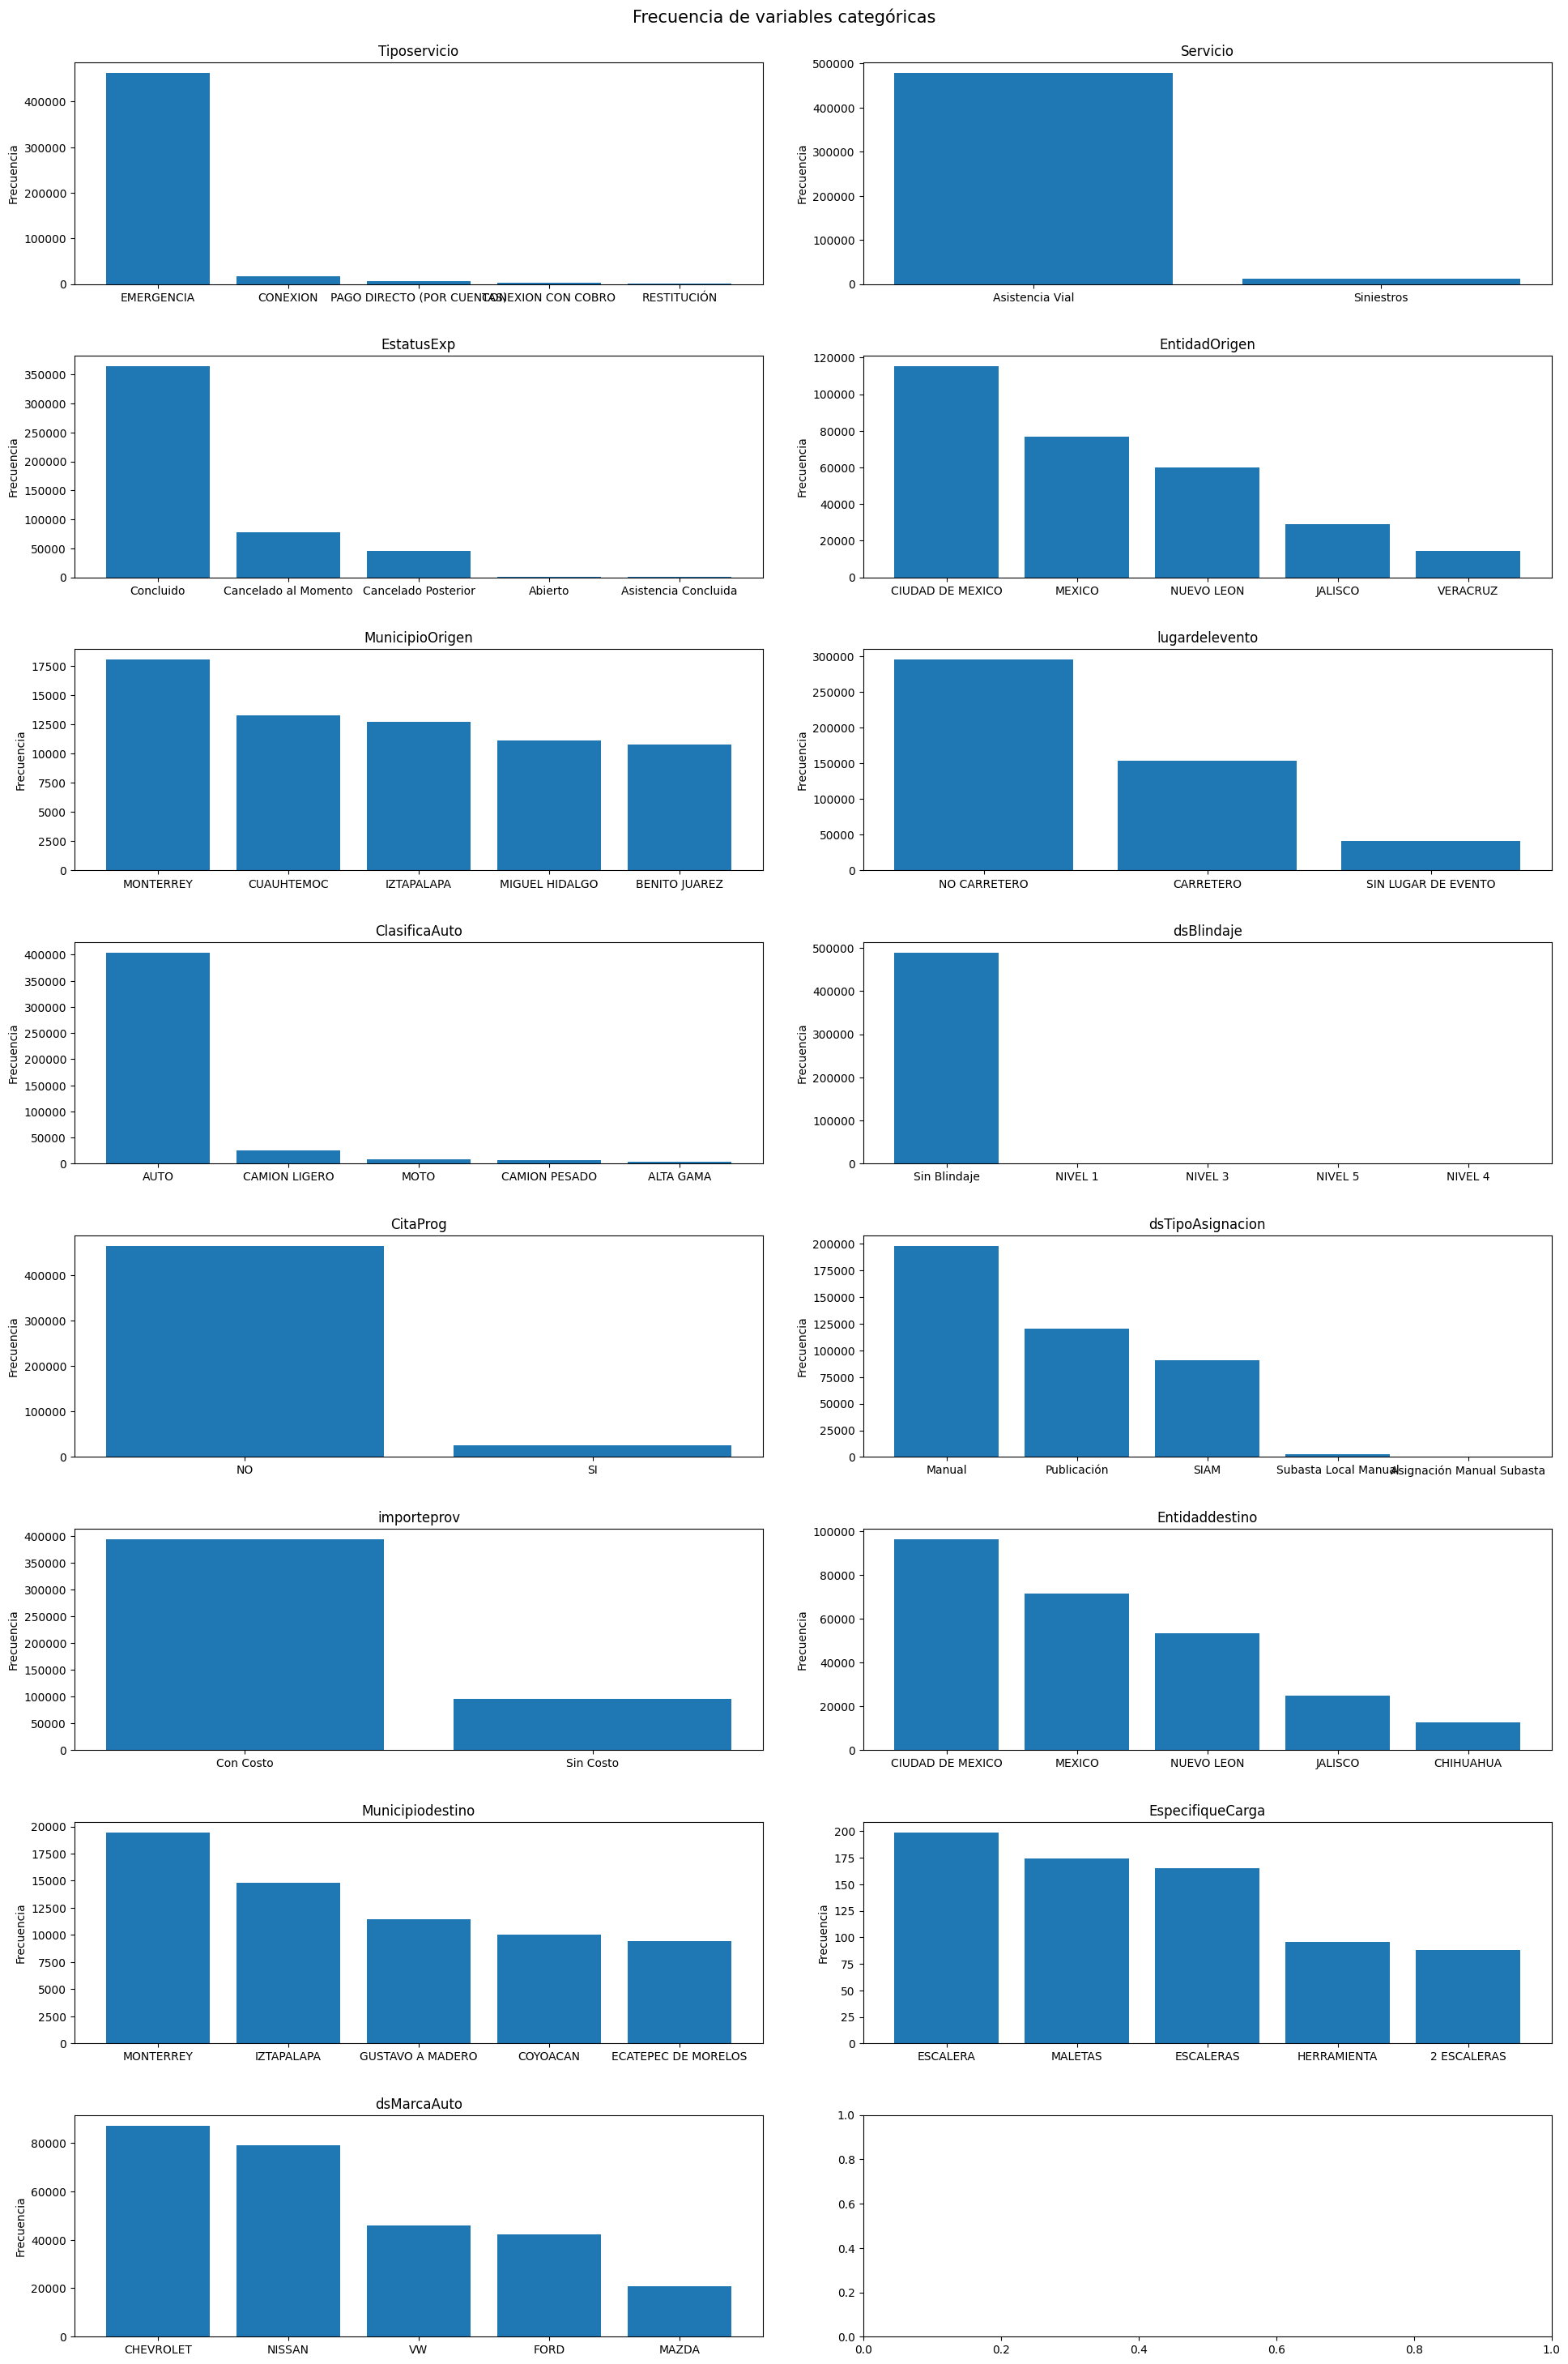

In [ ]:
# Visualizando la frecuencia (top 5) de las variables categóricas

value_counts1 = df['Tiposervicio'].value_counts().nlargest(5)
value_counts2 = df['Servicio'].value_counts().nlargest(5)
value_counts3 = df['EstatusExp'].value_counts().nlargest(5)
value_counts4 = df['EntidadOrigen'].value_counts().nlargest(5)
value_counts5 = df['MunicipioOrigen'].value_counts().nlargest(5)
value_counts6 = df['lugardelevento'].value_counts().nlargest(5)
value_counts7 = df['dsBlindaje'].value_counts().nlargest(5)
value_counts8 = df['ClasificaAuto'].value_counts().nlargest(5)
value_counts9 = df['CitaProg'].value_counts().nlargest(5)
value_counts10 = df['dsTipoAsignacion'].value_counts().nlargest(5)
value_counts11 = df['importeprov'].value_counts().nlargest(5)
value_counts12 = df['Entidaddestino'].value_counts().nlargest(5)
value_counts13 = df['Municipiodestino'].value_counts().nlargest(5)
value_counts14 = df['EspecifiqueCarga'].value_counts().nlargest(5)
value_counts15 = df['dsMarcaAuto'].value_counts().nlargest(5)


fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(20, 30))
fig.suptitle('Frecuencia de variables categóricas', fontsize=15, verticalalignment='top')

plt.subplots_adjust(top=25)
axs[0, 0].bar(value_counts1.index, value_counts1.values)
axs[0, 0].set_title('Tiposervicio')
axs[0, 0].set_ylabel('Frecuencia')

axs[0, 1].bar(value_counts2.index, value_counts2.values)
axs[0, 1].set_title('Servicio')
axs[0,1].set_ylabel('Frecuencia')

axs[1,0].bar(value_counts3.index, value_counts3.values)
axs[1,0].set_title('EstatusExp')
axs[1,0].set_ylabel('Frecuencia')

axs[1,1].bar(value_counts4.index, value_counts4.values)
axs[1,1].set_title('EntidadOrigen')
axs[1,1].set_ylabel('Frecuencia')

axs[2,0].bar(value_counts5.index, value_counts5.values)
axs[2,0].set_title('MunicipioOrigen')
axs[2,0].set_ylabel('Frecuencia')

axs[2,1].bar(value_counts6.index, value_counts6.values)
axs[2,1].set_title('lugardelevento')
axs[2,1].set_ylabel('Frecuencia')

axs[3,0].bar(value_counts8.index, value_counts8.values)
axs[3,0].set_title('ClasificaAuto')
axs[3,0].set_ylabel('Frecuencia')

axs[3,1].bar(value_counts7.index, value_counts7.values)
axs[3,1].set_title('dsBlindaje')
axs[3,1].set_ylabel('Frecuencia')

axs[4,0].bar(value_counts9.index, value_counts9.values)
axs[4,0].set_title('CitaProg')
axs[4,0].set_ylabel('Frecuencia')

axs[4,1].bar(value_counts10.index, value_counts10.values)
axs[4,1].set_title('dsTipoAsignacion')
axs[4,1].set_ylabel('Frecuencia')

axs[5,0].bar(value_counts11.index, value_counts11.values)
axs[5,0].set_title('importeprov')
axs[5,0].set_ylabel('Frecuencia')

axs[5,1].bar(value_counts12.index, value_counts12.values)
axs[5,1].set_title('Entidaddestino')
axs[5,1].set_ylabel('Frecuencia')

axs[6,0].bar(value_counts13.index, value_counts13.values)
axs[6,0].set_title('Municipiodestino')
axs[6,0].set_ylabel('Frecuencia')

axs[6,1].bar(value_counts14.index, value_counts14.values)
axs[6,1].set_title('EspecifiqueCarga')
axs[6,1].set_ylabel('Frecuencia')

axs[7,0].bar(value_counts15.index, value_counts15.values)
axs[7,0].set_title('dsMarcaAuto')
axs[7,0].set_ylabel('Frecuencia')


plt.tight_layout(pad=3.0)

plt.show()


In [ ]:
df_X = ['Tiposervicio','Servicio','SubServicio','EstatusExp','FechaApertura','FechaAsignacion','Fechallegada','EntidadOrigen','MunicipioOrigen','Costo','lugardelevento','EstatusProv','dsBlindaje','ClasificaAuto','CitaProg','dsTipoAsignacion','importeprov','Entidaddestino','Municipiodestino','clCuenta','TieneCita','ProveedorAsignado','CntMonitoreosAProveedor','EspecifiqueCarga','dsMarcaAuto','LatitudExp','LongitudExp','CP','dsTipoAuto','Cl Proveedor','Fecha_AsisConcluida','Fecha_Termino','Fecha_RegisPago']
df_Y = ['CostoPagado']

## Análisis bi/multivariante

## Preprocesamiento

Con el fin de contar con datos de calidad que nos sirvan para su correcto análisis y modelado, es necesario implementar una serie de transformaciones para definir qué hacer con los valores nulos/faltantes y eliminar variables que no son de utilidad.

Por lo anterior, definimos una serie de reglas a implementar en el dataset.

### Aplicación de reglas

Con el fin de mejorar la calidad de la base de datos, es necesario aplicar las siguientes reglas de limpieza y manipulación de datos:

1. Tipo de Servicio: Sólo considerar 'Emergencia', ya que son los servicios que brindo un proveedor en el momento que lo solicitó un usuario.
2. Estatus: Quitar los servicios Cancelado al Momento, por que no se asignó un proveedor y por lo tanto no generan un costo.
3. Estatus Proveedor: Quitar los NULL por que no se asigno un proveedor.
4. Eliminar los servicios de Siniestrios
5. Especifique Carga: Es un campo que sirve sólo para algunas cuentas por lo que esta casi siempre vacio
6. Sí el campo Entidad/Municipio destino esta vació se debe colocar Entidad/Municipio Origen, por que muchos de los servicios que son en el mismo origen a los coordinadores se les olvida llenar este campo.
7. Si el campo Lugar del Evento esta vacio, realizar esta regla, si Entidad Origen y Entidad Destino son iguales, el servicio es NO CARRETERO, sí Entidad Origen y Entidad Destino son diferentes, el servicio es CARRETERO, los faltantes son NO CARRETEROS

In [ ]:
#Dataframe para limpieza
df_clean = df

In [ ]:

# Aplicación Regla 1
df_clean = df_clean[df_clean["Tiposervicio"] == "EMERGENCIA"]

# Aplicación Regla 2
df_clean = df_clean[df_clean["EstatusExp"] != "Cancelado al Momento"]

# Aplicación Regla 3
df_clean = df_clean[df_clean["EstatusProv"] != "NULL"]

# Aplicación Regla 4
df_clean = df_clean[df_clean["Servicio"] != "Siniestros"]

# Aplicación Regla 5
columnas = ["EspecifiqueCarga"]
df_clean = df_clean.drop(columns=columnas, errors='ignore')

# Aplicación Regla 6

df_clean['Municipiodestino'] = df_clean['Municipiodestino'].fillna(df_clean['MunicipioOrigen'])
df_clean['Entidaddestino'] = df_clean['Entidaddestino'].fillna(df_clean['EntidadOrigen'])

# Aplicación Regla 7

def replace_lugarevento(row):
    if row['EntidadOrigen'] == row['Entidaddestino']:
        return 'NO CARRETERO'
    else:
        return 'CARRETERO'

df_clean['lugardelevento'] = df_clean['lugardelevento'].fillna(df_clean.apply(replace_lugarevento, axis=1))

valoresfaltantes= df_clean.isnull().sum()
valoresfaltantes

Expediente                      0
Tiposervicio                    0
Servicio                        0
SubServicio                     0
EstatusExp                      0
FechaApertura                   0
FechaAsignacion                53
Fechallegada                28214
EntidadOrigen                  12
MunicipioOrigen                12
Costo                           0
CostoPagado                   651
lugardelevento                  0
EstatusProv                    55
dsBlindaje                      0
ClasificaAuto                  12
CitaProg                        0
dsTipoAsignacion               53
importeprov                     0
Entidaddestino                 12
Municipiodestino               12
clCuenta                        0
TieneCita                       0
ProveedorAsignado               0
CntMonitoreosAProveedor         0
dsMarcaAuto                   189
LatitudExp                    495
LongitudExp                   495
CP                           1533
dsTipoAuto    

In [ ]:
rows, columns = df.shape
print(f'El dataset base contiene {rows} registros y {columns} columnas.')
rows, columns = df_clean.shape
print(f'El dataset limpio contiene {rows} registros y {columns} columnas.')

El dataset base contiene 491281 registros y 37 columnas.
El dataset limpio contiene 393920 registros y 36 columnas.


Convertir tipo de variables

In [ ]:
df_labels = df_clean.columns.tolist()
print(df_labels)

['Expediente', 'Tiposervicio', 'Servicio', 'SubServicio', 'EstatusExp', 'FechaApertura', 'FechaAsignacion', 'Fechallegada', 'EntidadOrigen', 'MunicipioOrigen', 'Costo', 'CostoPagado', 'lugardelevento', 'EstatusProv', 'dsBlindaje', 'ClasificaAuto', 'CitaProg', 'dsTipoAsignacion', 'importeprov', 'Entidaddestino', 'Municipiodestino', 'clCuenta', 'TieneCita', 'ProveedorAsignado', 'CntMonitoreosAProveedor', 'dsMarcaAuto', 'LatitudExp', 'LongitudExp', 'CP', 'dsTipoAuto', 'Cl Proveedor', 'Fecha_AsisConcluida', 'Fecha_Termino', 'Fecha_RegisPago', 'FechasRegisFactura', 'EstatusCXP']


In [ ]:
df_labels = ['Expediente','Tiposervicio','Servicio','SubServicio','EstatusExp','FechaApertura','FechaAsignacion','Fechallegada','EntidadOrigen','MunicipioOrigen','Costo','CostoPagado','lugardelevento','EstatusProv','dsBlindaje','ClasificaAuto','CitaProg','dsTipoAsignacion','importeprov','Entidaddestino','Municipiodestino','clCuenta','TieneCita','ProveedorAsignado','CntMonitoreosAProveedor','EspecifiqueCarga','dsMarcaAuto','LatitudExp','LongitudExp','CP','dsTipoAuto','Cl Proveedor','Fecha_AsisConcluida','Fecha_Termino','Fecha_RegisPago','EstatusCXP']

In [ ]:
df_column_time = ['FechaApertura','FechaAsignacion','Fechallegada','Fecha_Termino','Fecha_AsisConcluida','FechasRegisFactura']
for col in df_column_time:
    print(col)
    df_clean[col] = pd.to_datetime(df_clean[col], format='%d/%m/%Y')


FechaApertura
FechaAsignacion
Fechallegada
Fecha_Termino
Fecha_AsisConcluida
FechasRegisFactura


In [ ]:
df_column_date = ['Fecha_RegisPago']
for col in df_column_date:
    print(col)
    #clean integers in date column
    df_clean.loc[df_clean[col].notnull() & df_clean[col].astype(str).str.isdigit(), col] = pd.NA
    df_clean[col] = pd.to_datetime(df_clean[col], format='%Y-%m-%d')

Fecha_RegisPago


In [ ]:
df_clean.loc[df_clean['CitaProg'] == 'NO', 'CitaProg'] = 0
df_clean.loc[df_clean['CitaProg'] == 'SI', 'CitaProg'] = 1

In [ ]:
df_clean.loc[df_clean['importeprov'] == 'Con Costo', 'importeprov'] = 1
df_clean.loc[df_clean['importeprov'] == 'Sin Costo', 'importeprov'] = 0

In [ ]:
df_column_bin = ['CitaProg','importeprov','TieneCita','ProveedorAsignado']
for col in df_column_bin:
    print(col)
    df_clean[col] = df_clean[col].astype(bool)

CitaProg
importeprov
TieneCita
ProveedorAsignado


In [ ]:
df_column_class = ['Tiposervicio','Servicio','SubServicio','EstatusExp','EntidadOrigen','MunicipioOrigen','lugardelevento','EstatusProv','dsBlindaje','ClasificaAuto','dsTipoAsignacion','Entidaddestino','Municipiodestino','dsMarcaAuto','EstatusCXP']
for col in df_column_class:
    print(col+'_index')
    df_clean[col+'_index'] = pd.factorize(df_clean[col])[0]

#lista de categorias indexadas
df_column_class_index = [item + '_index' for item in df_column_class]

Tiposervicio_index
Servicio_index
SubServicio_index
EstatusExp_index
EntidadOrigen_index
MunicipioOrigen_index
lugardelevento_index
EstatusProv_index
dsBlindaje_index
ClasificaAuto_index
dsTipoAsignacion_index
Entidaddestino_index
Municipiodestino_index
dsMarcaAuto_index
EstatusCXP_index


In [ ]:
#Limpieza de valores nulos con 0 y que no afectan a al modelo
df_clean['CP'].fillna(0, inplace=True)
df_clean['Costo'].fillna(0, inplace=True)
df_clean['CostoPagado'].fillna(0, inplace=True)

In [ ]:
df_column_cost = ['Costo','CostoPagado']

In [ ]:
df_column_int = ['Expediente','clCuenta','CntMonitoreosAProveedor','CP','Cl Proveedor']
for col in df_column_int:
    print(col)
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').astype(int)

Expediente
clCuenta
CntMonitoreosAProveedor
CP
Cl Proveedor


In [ ]:
df_label_processed = df_column_time+df_column_date+df_column_bin+df_column_class_index+df_column_int+df_column_cost
df_label_processed

['FechaApertura',
 'FechaAsignacion',
 'Fechallegada',
 'Fecha_Termino',
 'Fecha_AsisConcluida',
 'FechasRegisFactura',
 'Fecha_RegisPago',
 'CitaProg',
 'importeprov',
 'TieneCita',
 'ProveedorAsignado',
 'Tiposervicio_index',
 'Servicio_index',
 'SubServicio_index',
 'EstatusExp_index',
 'EntidadOrigen_index',
 'MunicipioOrigen_index',
 'lugardelevento_index',
 'EstatusProv_index',
 'dsBlindaje_index',
 'ClasificaAuto_index',
 'dsTipoAsignacion_index',
 'Entidaddestino_index',
 'Municipiodestino_index',
 'dsMarcaAuto_index',
 'EstatusCXP_index',
 'Expediente',
 'clCuenta',
 'CntMonitoreosAProveedor',
 'CP',
 'Cl Proveedor',
 'Costo',
 'CostoPagado']

In [ ]:
df_col_class = [i for i in df_labels if i not in df_label_processed+df_column_class]
df_col_class

['EspecifiqueCarga', 'LatitudExp', 'LongitudExp', 'dsTipoAuto']

Descartamos estas 4 variables por errores en la información proporcionada desde la fuente.

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393920 entries, 3 to 41799
Data columns (total 51 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Expediente               393920 non-null  int64         
 1   Tiposervicio             393920 non-null  object        
 2   Servicio                 393920 non-null  object        
 3   SubServicio              393920 non-null  object        
 4   EstatusExp               393920 non-null  object        
 5   FechaApertura            393920 non-null  datetime64[ns]
 6   FechaAsignacion          393867 non-null  datetime64[ns]
 7   Fechallegada             365706 non-null  datetime64[ns]
 8   EntidadOrigen            393908 non-null  object        
 9   MunicipioOrigen          393908 non-null  object        
 10  Costo                    393920 non-null  float64       
 11  CostoPagado              393920 non-null  float64       
 12  lugardelevento   

In [ ]:
df_clean.nunique()

Expediente                 393920
Tiposervicio                    1
Servicio                        1
SubServicio                     5
EstatusExp                      4
FechaApertura                 365
FechaAsignacion               367
Fechallegada                  368
EntidadOrigen                  33
MunicipioOrigen              1815
Costo                       32071
CostoPagado                 26649
lugardelevento                  3
EstatusProv                     4
dsBlindaje                      6
ClasificaAuto                   6
CitaProg                        2
dsTipoAsignacion                6
importeprov                     2
Entidaddestino                 33
Municipiodestino             1284
clCuenta                      184
TieneCita                       2
ProveedorAsignado               2
CntMonitoreosAProveedor        40
dsMarcaAuto                    73
LatitudExp                 367755
LongitudExp                334690
CP                          18811
dsTipoAuto    

In [ ]:
df_clean.head()

,Expediente,Tiposervicio,Servicio,SubServicio,EstatusExp,FechaApertura,FechaAsignacion,Fechallegada,EntidadOrigen,MunicipioOrigen,...,MunicipioOrigen_index,lugardelevento_index,EstatusProv_index,dsBlindaje_index,ClasificaAuto_index,dsTipoAsignacion_index,Entidaddestino_index,Municipiodestino_index,dsMarcaAuto_index,EstatusCXP_index
3,18971029,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-01-31,2023-01-31,2023-02-01,BAJA CALIFORNIA,ENSENADA,...,0,0,0,0,0,0,0,0,0,0
5,18971026,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-01-31,2023-02-01,2023-02-01,NUEVO LEON,GUADALUPE,...,1,0,0,0,0,0,1,1,1,0
6,18971025,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-01-31,2023-01-31,2023-02-01,GUANAJUATO,LEON,...,2,0,0,0,0,0,2,2,2,0
7,18971024,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-01-31,2023-01-31,2023-02-01,CIUDAD DE MEXICO,BENITO JUAREZ,...,3,0,0,0,0,1,3,3,3,0
8,18971023,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-01-31,2023-02-01,2023-02-01,TABASCO,CUNDUACAN,...,4,1,0,1,0,0,4,4,4,1


In [ ]:
df_analysis = pd.DataFrame()
for col in df_label_processed:
  df_analysis[col] = df_clean[col]
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393920 entries, 3 to 41799
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   FechaApertura            393920 non-null  datetime64[ns]
 1   FechaAsignacion          393867 non-null  datetime64[ns]
 2   Fechallegada             365706 non-null  datetime64[ns]
 3   Fecha_Termino            392619 non-null  datetime64[ns]
 4   Fecha_AsisConcluida      393865 non-null  datetime64[ns]
 5   FechasRegisFactura       244397 non-null  datetime64[ns]
 6   Fecha_RegisPago          169590 non-null  datetime64[ns]
 7   CitaProg                 393920 non-null  bool          
 8   importeprov              393920 non-null  bool          
 9   TieneCita                393920 non-null  bool          
 10  ProveedorAsignado        393920 non-null  bool          
 11  Tiposervicio_index       393920 non-null  int64         
 12  Servicio_index   

Guardar dataset para analisis

In [ ]:
df_analysis.to_csv('/content/2023_Analysis_Dataset.csv', index=False)

Análisis de Asimetría

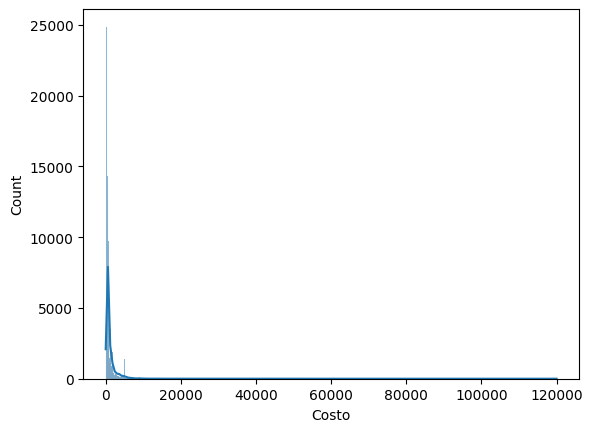

Asimetría original: 17.265444473668268


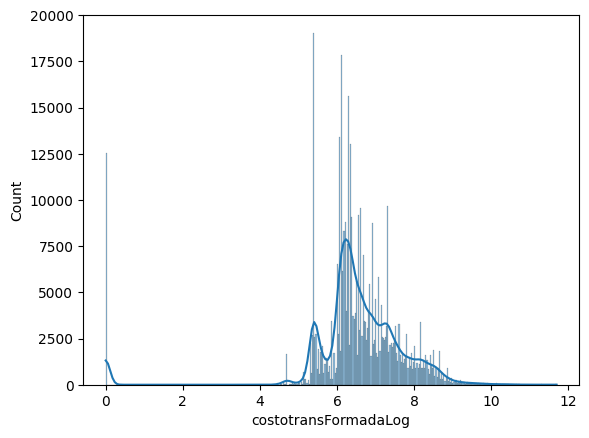

Asimetría transformación Logarítmica: -2.4689930723011555


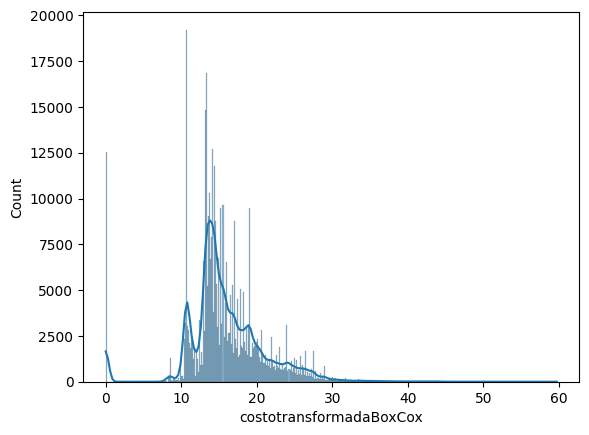

Asimetría después de la transformación Box-Cox: 0.30642748272719816


In [ ]:
#Distribución Original
sns.histplot(df_analysis['Costo'], kde=True)
plt.show()

# Asimetría original
print("Asimetría original:", df_analysis['Costo'].skew())

# Transformación logarítmica


df_analysis['costotransFormadaLog'] = np.log1p(df_analysis['Costo'])

# Gráfica Transformación logarítmica
sns.histplot(df_analysis['costotransFormadaLog'], kde=True)
plt.show()

# Calculamos Asimetría de la Transformación Logarítmica
print("Asimetría transformación Logarítmica:", df_analysis['costotransFormadaLog'].skew())

#Transformación Box-Cox

# Revisamos que los valores sean mayores a 0
df_analysis['Costo'] = df_analysis['Costo'] + 1

# Transformación de Box-Cox
df_analysis['costotransformadaBoxCox'], fitted_lambda = stats.boxcox(df_analysis['Costo'])

# Gráfica Transformación Box-Cox
sns.histplot(df_analysis['costotransformadaBoxCox'], kde=True)
plt.show()

# Calculamos Asimetría de la Transformación Box-Cox
print("Asimetría después de la transformación Box-Cox:", pd.Series(df_analysis['costotransformadaBoxCox']).skew())

<ipython-input-46-db70633768b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_analysis.corr()


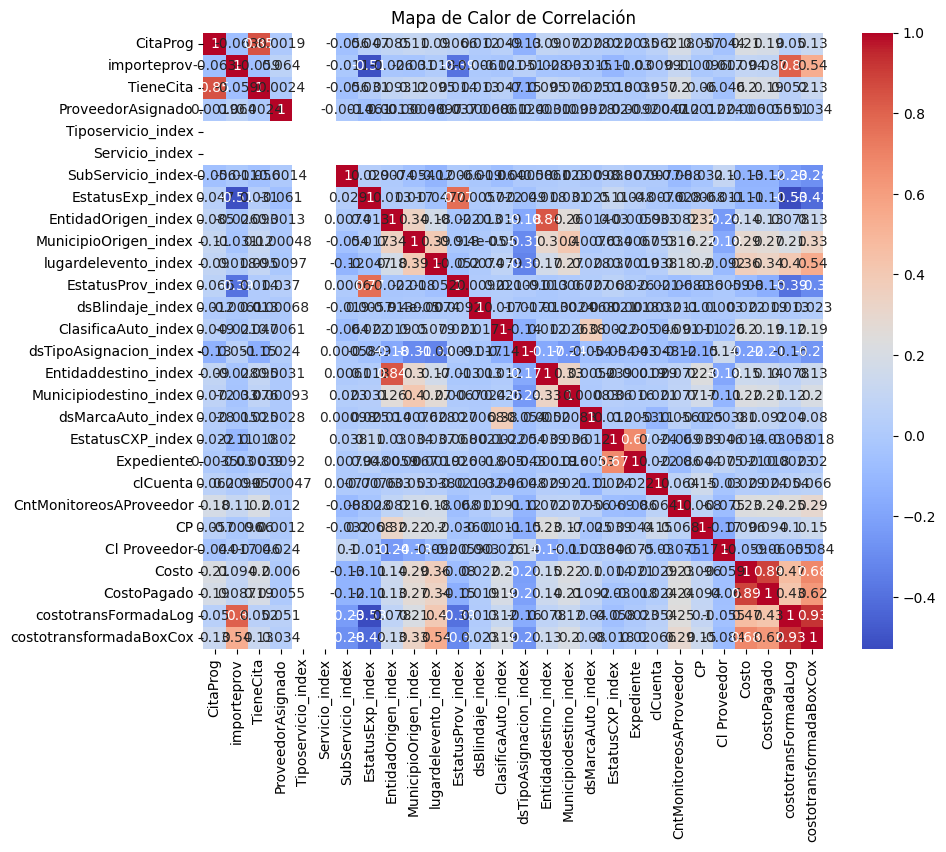

                         CitaProg  importeprov  TieneCita  ProveedorAsignado  \
CitaProg                 1.000000    -0.063370   0.849940           0.001923   
importeprov             -0.063370     1.000000  -0.059268           0.063967   
TieneCita                0.849940    -0.059268   1.000000           0.002441   
ProveedorAsignado        0.001923     0.063967   0.002441           1.000000   
Tiposervicio_index            NaN          NaN        NaN                NaN   
Servicio_index                NaN          NaN        NaN                NaN   
SubServicio_index       -0.056086    -0.010565  -0.056345          -0.001400   
EstatusExp_index         0.046733    -0.511929   0.030844          -0.061208   
EntidadOrigen_index      0.085410    -0.025596   0.092518           0.001272   
MunicipioOrigen_index    0.107631    -0.031437   0.115544          -0.000483   
lugardelevento_index     0.089804     0.017738   0.095164          -0.009730   
EstatusProv_index        0.065960    -0.

In [ ]:
# Calculando la correlación
correlation_matrix = df_analysis.corr()

# Visualizando la correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlación")
plt.show()

print(correlation_matrix)

## Conclusiones Avance 1


El análisis exploratorio de datos (EDA) nos permitió entender las características clave de nuestro dataset. Mediante técnicas estadísticas y visuales, como histogramas y el cálculo de cardinalidad, analizamos y comprendimos los datos.

¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? `

Se implementaron reglas de negocio específicas para mitigar la incidencia de datos incompletos o ausentes, lo que nos ayudo significativamente a mejorar la calidad del conjunto de datos. Una de los cambios más notables fue la identificación de errores, inconsistencias y valores nulos en las variables 'EntidadDestino' y 'MunicipioDestino'. Para cambiar este problema, el área de operaciónes nos indicó que este comportamiento es un error tipo en la operación: los valores faltantes en estas variables fueron reemplazados por los correspondientes de 'EntidadOrigen' y 'MunicipioOrigen'. Ya que, habitualmente, los coordinadores no completan los campos de destino cuando el servicio se lleva a cabo en el mismo lugar de origen.

¿Cuáles son las estadísticas resumidas del conjunto de datos?

El conjunto de datos contiene un total de 491,281 registros, abarcando 37 columnas distintas. Estos registros representan todos los servicios de asistencia vial prestados durante el año 2023. Sin embargo, tras la aplicación de reglas de negocio para mejorar la relevancia de los datos, la base se redujo a 393,865 registros. Este proceso de filtrado asegura que el análisis se centre en los datos más pertinentes. Se presentan en promedio 30,000 a 35,000 servicios mensuales, en el cual se destaca el subservicio de arrastre de grúa ya que es el más utilizado, el cual representa el 87% de los servicios de asistencia vial. Además, el 68% de estos servicios son clasificados como 'No carreteros', lo que indica una predominancia de servicios en zonas urbanas. En cuanto a los costos, el análisis muestra que el costo promedio de los servicios de asistencia vial es de 1,224 pesos mexicanos. Sin embargo, es importante señalar que en el 75% de los casos, el costo promedio es menor a 1,149 pesos mexicanos. Esta distribución de costos proporciona una visión valiosa sobre la estructura de precios de los servicios y será un factor clave cuando calculemos el monto del flujo de efectivo y las proyección de pago a los proveedores.

¿Hay valores atípicos en el conjunto de datos?

En el análisis descriptivo de la variable 'CostoPagado', notamos un sesgo significativo y la presencia de numerosos outliers. Existen servicios con costo de 195,000 pesos mexicanos, que por el tipo de servicios podrían ser errores o servicios que requirieron de alguna complejidad mayor. Tendremos que analizarlo, para el pronóstico del costo de los servicios abiertos.

¿Cuál es la cardinalidad de las variables categóricas?

Las principales variables cuenta con la siguiente cardinalidad una vez aplicado las reglas de negocio:

Cardinalidad de SubServicio: 5
Cardinalidad de EstatusExp: 4
Cardinalidad de lugardelevento: 2
Cardinalidad de EstatusProv: 4
Cardinalidad de ClasificaAuto: 6
Cardinalidad de CitaProg: 2
Cardinalidad de dsTipoAsignacion: 6
Cardinalidad de TieneCita: 2
Cardinalidad de dsMarcaAuto: 73
Cardinalidad de EstatusCXP: 2
¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

Realizamos el análisis de sesgo para la variable númerica del costo, en el cual obtuvimos un resultado de asimetria del 14.98, este es un valor muy alto, lo que indica un sesgo extremadamente fuerte hacia la derecha y una cola larga hacia la derecha sugiere la presencia de valores extremadamente altos en comparación con el resto de los datos.

Al aplicar la transformación logarítmica, la asimetría se ha reducido significativamente, pero nos dió negativa. Lo que significa que la transformación ha sobreajustado la corrección del sesgo original, creando una nueva distribución con una cola larga hacia la izquierda, por lo que debemos de buscar otro tipo de transformación.

La transformación de Box-Cox nos dió una asimetría del -0.08, Esta asimetría es muy cerca de cero, lo que sugiere que la distribución de tus datos transformados es ahora aproximadamente normal.

¿Hay correlación entre las variables dependientes e independientes?

No existe una estrecha relación particular entre el costo y las variables dependientes, lo que suguiere que el costo se determina por más de una variable.

¿Cómo se distribuyen los datos en función de diferentes categorías?

En el análisis de la distribución de los datos se utilizaron histogramas para obtener una visualización de las diferentes categorías. El servicio más utilizado es el arrastre de grúa, además, se observó que la mayoría de los servicios son clasificados como 'No Carreteros'.

Otro aspecto fue que predominaron los servicios brindados en la Ciudad de México (CDMX), particularmente a vehículos particulares. Entre las marcas de automóviles, Chevrolet y Nissan.

El análisis de datos nos permitió conocer cuáles son los tipos de servicios más frecuentes, en qué entidades se generan la mayor cantidad de servicios, los costos por tipo de servicio, los tipos de vehículos que más servicios demandan, entre otra información de gran importancia a la hora de estimar los costos por pagar.


## Avance 2. Análisis de Supervivencia

Para realizar un análisis de supervivencia se identificaron tres etapas(de *FechaApertura* a *Fecha_AsisConcluida*, de *Fecha_AsisConcluida* a *Fecha_Termino*, y de *Fecha_Termino* a *FechasRegisFactura*), deberíamos considerar cada etapa como un análisis separado, dado que cada una representa un proceso distinto y, por ende, podría estar influenciada por factores diferentes.

1. **Etapa 1:** De *FechaApertura* a *Fecha_AsisConcluida*
Esta etapa es el tiempo desde la apertura del expediente hasta la conclusión de la asistencia, es decir, cuando el proveedor termina el servicio.

2. **Etapa 2:** De *Fecha_AsisConcluida* a *Fecha_Termino*
Esta etapa representa el tiempo desde la conclusión de la asistencia hasta el término oficial del expediente. Cuando se han validado los costos incurridos en el servicio y es un servicio facturable

3. **Etapa 3:** De *Fecha_Termino* a *FechasRegisFactura*
Finalmente, esta etapa abarca desde el término del expediente hasta el registro de la factura, indicando el tiempo para finalizar el aspecto financiero del servicio y cuando se ha pagado

Etapa 1

In [ ]:
# Etapa 1

df_analysis['Semana'] = df_analysis['FechaApertura'].dt.isocalendar().week

# Calculando la duración en días

df_analysis['DuracionEtapa1'] = (df_analysis['Fecha_AsisConcluida'] - df_analysis['FechaApertura']).dt.days

# Identificando registros censurados
df_analysis['Censurado'] = df_analysis['Fecha_AsisConcluida'].notna().astype(int)

df_analysis.describe()

,Tiposervicio_index,Servicio_index,SubServicio_index,EstatusExp_index,EntidadOrigen_index,MunicipioOrigen_index,lugardelevento_index,EstatusProv_index,dsBlindaje_index,ClasificaAuto_index,...,Expediente,clCuenta,CntMonitoreosAProveedor,CP,Cl Proveedor,Costo,CostoPagado,Semana,DuracionEtapa1,Censurado
count,393920.0,393920.0,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,...,3.939200e+05,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.0,393865.000000,393920.000000
mean,0.0,0.0,0.182971,0.115831,7.974756,105.080194,0.324299,0.155587,0.013561,0.170288,...,1.927050e+07,1809.914810,2.187226,44442.982674,8669.982151,1266.670484,1082.333790,26.826635,1.945040,0.999860
std,0.0,0.0,0.516189,0.335633,7.859710,197.304258,0.468178,0.362954,0.230822,0.649637,...,2.118169e+05,737.921036,2.122325,28761.534832,4250.395613,2450.548827,2263.943437,15.022451,6.818072,0.011815
min,0.0,0.0,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,...,1.891442e+07,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.0,0.0,0.000000,0.000000,3.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,1.908421e+07,1213.000000,1.000000,14210.000000,6872.000000,450.000000,302.000000,14.0,0.000000,1.000000
50%,0.0,0.0,0.000000,0.000000,5.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.926788e+07,1796.000000,2.000000,52484.500000,10878.000000,650.000000,565.200000,27.0,1.000000,1.000000
75%,0.0,0.0,0.000000,0.000000,12.000000,90.000000,1.000000,0.000000,0.000000,0.000000,...,1.945233e+07,2585.000000,3.000000,66384.000000,11635.000000,1310.000000,1096.400000,40.0,1.000000,1.000000
max,0.0,0.0,4.000000,3.000000,32.000000,1814.000000,2.000000,3.000000,5.000000,5.000000,...,1.964661e+07,2866.000000,76.000000,99993.000000,12818.000000,120000.000000,120000.000000,52.0,272.000000,1.000000


In [ ]:
censurados_count = df_analysis['Censurado'].value_counts()
censurados_count

1    393865
0        55
Name: Censurado, dtype: int64

Aunque la mayoría de los servicios se concluyen en 2 días, hay una cola larga de casos que toman mucho más tiempo en concluir. La desviación estándar en comparación con la media nos puede indicar una distribución de duraciones sesgada, con una minoría de casos extendiéndose con duración más alta.

# Modelo de Cox
Este modelo permite explorar cómo las diferentes covariables afectan el riesgo relativo de que ocurra el evento de interés a lo largo del tiempo.

In [ ]:
#MODELO COX

df_cox = df_analysis[['DuracionEtapa1', 'Censurado','SubServicio_index','lugardelevento_index']].copy()
df_cox.dropna(inplace=True)

cph = CoxPHFitter()

cph.fit(df_cox, duration_col='DuracionEtapa1', event_col='Censurado')


print(cph.summary)

                          coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                             
SubServicio_index     0.186830   1.205423  0.002998        0.180953   
lugardelevento_index -0.187496   0.829033  0.003433       -0.194224   

                      coef upper 95%  exp(coef) lower 95%  \
covariate                                                   
SubServicio_index           0.192707             1.198359   
lugardelevento_index       -0.180768             0.823474   

                      exp(coef) upper 95%  cmp to          z    p  -log2(p)  
covariate                                                                    
SubServicio_index                1.212528     0.0  62.309509  0.0       inf  
lugardelevento_index             0.834629     0.0 -54.621267  0.0       inf  


Interpretación de los Resultados

Coeficiente (coef): 0.186830. Un incremento unitario en SubServicio_index está asociado con un aumento del 20.5% en el riesgo relativo del evento de interés. Este efecto es estadísticamente significativo.
Razón de riesgo (exp(coef)): 1.205423, lo cual reafirma que un aumento en esta covariable aumenta el riesgo de que ocurra el evento.
lugardelevento_index

Coeficiente (coef): -0.187496. Un incremento unitario en lugardelevento_index se asocia con una disminución del 17.1% en el riesgo relativo del evento. Este efecto también es estadísticamente significativo.
Razón de riesgo (exp(coef)): 0.829033, lo que indica que un aumento en esta covariable reduce el riesgo de que ocurra el evento.

In [ ]:
# Ajustar los datos y estimar la función de supervivencia
kmf = KaplanMeierFitter()
kmf.fit(df_cox['DuracionEtapa1'], event_observed=df_cox['Censurado'])

# Estimar la mediana de la supervivencia
mediana_supervivencia = kmf.median_survival_time_

print(f"La mediana estimada de la supervivencia es de {mediana_supervivencia} días")

La mediana estimada de la supervivencia es de 1.0 días


Vemos que en la Etapa 1, cuya ventana de tiempo es de la apertura del expediente a la conclusión de la asistencia (cuando el proveedor termina el servicio), la mediana estimada de supervivencia es de 1 día. Esto nos hace sentido ya que los servicios se brindan y concluyen el mismo día que son recibidos.

Etapa 2

In [ ]:
# Calculando la duración en días

df_analysis['DuracionEtapa2'] = (df_analysis['Fecha_Termino'] - df_analysis['Fecha_AsisConcluida']).dt.days

# Identificando registros censurados
df_analysis['Censurado2'] = df_analysis['Fecha_Termino'].notna().astype(int)

df_analysis.describe()

,Tiposervicio_index,Servicio_index,SubServicio_index,EstatusExp_index,EntidadOrigen_index,MunicipioOrigen_index,lugardelevento_index,EstatusProv_index,dsBlindaje_index,ClasificaAuto_index,...,CntMonitoreosAProveedor,CP,Cl Proveedor,Costo,CostoPagado,Semana,DuracionEtapa1,Censurado,DuracionEtapa2,Censurado2
count,393920.0,393920.0,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,...,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.0,393865.000000,393920.000000,392619.000000,393920.000000
mean,0.0,0.0,0.182971,0.115831,7.974756,105.080194,0.324299,0.155587,0.013561,0.170288,...,2.187226,44442.982674,8669.982151,1266.670484,1082.333790,26.826635,1.945040,0.999860,7.888765,0.996697
std,0.0,0.0,0.516189,0.335633,7.859710,197.304258,0.468178,0.362954,0.230822,0.649637,...,2.122325,28761.534832,4250.395613,2450.548827,2263.943437,15.022451,6.818072,0.011815,11.927817,0.057374
min,0.0,0.0,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,-35.000000,0.000000
25%,0.0,0.0,0.000000,0.000000,3.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,14210.000000,6872.000000,450.000000,302.000000,14.0,0.000000,1.000000,0.000000,1.000000
50%,0.0,0.0,0.000000,0.000000,5.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,52484.500000,10878.000000,650.000000,565.200000,27.0,1.000000,1.000000,3.000000,1.000000
75%,0.0,0.0,0.000000,0.000000,12.000000,90.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,66384.000000,11635.000000,1310.000000,1096.400000,40.0,1.000000,1.000000,10.000000,1.000000
max,0.0,0.0,4.000000,3.000000,32.000000,1814.000000,2.000000,3.000000,5.000000,5.000000,...,76.000000,99993.000000,12818.000000,120000.000000,120000.000000,52.0,272.000000,1.000000,202.000000,1.000000


In [ ]:
censurados2_count = df_analysis['Censurado2'].value_counts()
censurados2_count

1    392619
0      1301
Name: Censurado2, dtype: int64

In [ ]:
#MODELO COX

df_cox2 = df_analysis[['DuracionEtapa2', 'Censurado2','SubServicio_index','lugardelevento_index']].copy()
df_cox2.dropna(inplace=True)

cph.fit(df_cox2, duration_col='DuracionEtapa2', event_col='Censurado2')


print(cph.summary)

                          coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                             
SubServicio_index    -0.006779   0.993244  0.002902       -0.012468   
lugardelevento_index -0.809483   0.445088  0.003525       -0.816392   

                      coef upper 95%  exp(coef) lower 95%  \
covariate                                                   
SubServicio_index          -0.001090             0.987610   
lugardelevento_index       -0.802574             0.442024   

                      exp(coef) upper 95%  cmp to           z         p  \
covariate                                                                 
SubServicio_index                0.998910     0.0   -2.335560  0.019514   
lugardelevento_index             0.448174     0.0 -229.646872  0.000000   

                      -log2(p)  
covariate                       
SubServicio_index     5.679334  
lugardelevento_index       inf  


In [ ]:
# Ajustar los datos y estimar la función de supervivencia
kmf = KaplanMeierFitter()
kmf.fit(df_cox2['DuracionEtapa2'], event_observed=df_cox2['Censurado2'])

# Estimar la mediana de la supervivencia
mediana_supervivencia = kmf.median_survival_time_

print(f"La mediana estimada de la supervivencia es de {mediana_supervivencia} días para la etapa 2")

La mediana estimada de la supervivencia es de 3.0 días para la etapa 2


En la Etapa 2 vemos un aumento a 3 días de la mediana estimada de supervivencia. Esta etapa abarca de la conclusión de la asistencia hasta el término oficial del expediente, cuando ya se han validado los costos en los que el servicio incurrió y se ha confirmado su facturación.

Etapa 3

In [ ]:
# Calculando la duración en días

df_analysis['DuracionEtapa3'] = (df_analysis['FechasRegisFactura'] - df_analysis['Fecha_Termino']).dt.days

# Identificando registros censurados
df_analysis['Censurado3'] = df_analysis['FechasRegisFactura'].notna().astype(int)

df_analysis.describe()

,Tiposervicio_index,Servicio_index,SubServicio_index,EstatusExp_index,EntidadOrigen_index,MunicipioOrigen_index,lugardelevento_index,EstatusProv_index,dsBlindaje_index,ClasificaAuto_index,...,Cl Proveedor,Costo,CostoPagado,Semana,DuracionEtapa1,Censurado,DuracionEtapa2,Censurado2,DuracionEtapa3,Censurado3
count,393920.0,393920.0,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,...,393920.000000,393920.000000,393920.000000,393920.0,393865.000000,393920.000000,392619.000000,393920.000000,243934.000000,393920.000000
mean,0.0,0.0,0.182971,0.115831,7.974756,105.080194,0.324299,0.155587,0.013561,0.170288,...,8669.982151,1266.670484,1082.333790,26.826635,1.945040,0.999860,7.888765,0.996697,16.392643,0.620423
std,0.0,0.0,0.516189,0.335633,7.859710,197.304258,0.468178,0.362954,0.230822,0.649637,...,4250.395613,2450.548827,2263.943437,15.022451,6.818072,0.011815,11.927817,0.057374,27.614107,0.485282
min,0.0,0.0,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,-35.000000,0.000000,-109.000000,0.000000
25%,0.0,0.0,0.000000,0.000000,3.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,6872.000000,450.000000,302.000000,14.0,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000
50%,0.0,0.0,0.000000,0.000000,5.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,10878.000000,650.000000,565.200000,27.0,1.000000,1.000000,3.000000,1.000000,7.000000,1.000000
75%,0.0,0.0,0.000000,0.000000,12.000000,90.000000,1.000000,0.000000,0.000000,0.000000,...,11635.000000,1310.000000,1096.400000,40.0,1.000000,1.000000,10.000000,1.000000,20.000000,1.000000
max,0.0,0.0,4.000000,3.000000,32.000000,1814.000000,2.000000,3.000000,5.000000,5.000000,...,12818.000000,120000.000000,120000.000000,52.0,272.000000,1.000000,202.000000,1.000000,266.000000,1.000000


In [ ]:
censurados3_count = df_analysis['Censurado3'].value_counts()
censurados3_count

1    244397
0    149523
Name: Censurado3, dtype: int64

In [ ]:
#MODELO COX

df_cox3 = df_analysis[['DuracionEtapa3', 'Censurado3','SubServicio_index','lugardelevento_index']].copy()
df_cox3.dropna(inplace=True)

cph.fit(df_cox3, duration_col='DuracionEtapa3', event_col='Censurado3')


print(cph.summary)

                          coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                             
SubServicio_index    -0.319672   0.726387  0.004910       -0.329296   
lugardelevento_index -0.105472   0.899900  0.004403       -0.114101   

                      coef upper 95%  exp(coef) lower 95%  \
covariate                                                   
SubServicio_index          -0.310048             0.719430   
lugardelevento_index       -0.096843             0.892168   

                      exp(coef) upper 95%  cmp to          z              p  \
covariate                                                                     
SubServicio_index                0.733412     0.0 -65.102774   0.000000e+00   
lugardelevento_index             0.907699     0.0 -23.956607  7.885515e-127   

                        -log2(p)  
covariate                         
SubServicio_index            inf  
lugardelevento_index  418.905663  


In [ ]:
# Ajustar los datos y estimar la función de supervivencia
kmf = KaplanMeierFitter()
kmf.fit(df_cox3['DuracionEtapa3'], event_observed=df_cox3['Censurado3'])

# Estimar la mediana de la supervivencia
mediana_supervivencia = kmf.median_survival_time_

print(f"La mediana estimada de la supervivencia es de {mediana_supervivencia} días para la etapa 3")

La mediana estimada de la supervivencia es de 7.0 días para la etapa 3


## Conclusiones Avance 2

Al entrar a la fase de "Preparación de los datos" para la construcción del modelo de predicción de gasto semana a semana en el contexto de la metodología CRISP-ML se han limpiado los datos recopilados del año anterior que incluye, costos, fechas y tipos de asistencia brindada.

En la fase de procesamiento de los datos, contamos con un df_analysis el cual recopila la información limpia del modelo, consolidando cada una de las caracteristicas del modelo.

Ademas, se necesita la generación de nuevas caractisticas como:

> Una variable que indique la semana del año.

>Una variable que calcule la diferencia entre la fechas criticas del registro y la fecha de pago.

>Se crearán las variables que reduzcan la complejidad de las variables, transformándolas en categoricas.

*   Tiposervicio_index
*   Servicio_index                
*   SubServicio_index             
*   EstatusExp_index              
*   EntidadOrigen_index           
*   MunicipioOrigen_index         
*   lugardelevento_index          
*   EstatusProv_index             
*   dsBlindaje_index              
*   ClasificaAuto_index           
*   dsTipoAsignacion_index        
*   Entidaddestino_index          
*   Municipiodestino_index        
*   dsMarcaAuto_index             
*   EstatusCXP_index

Para el modelo de supervivencia se ha utilizado el modelo Kaplan-
Meier, ya que es de facil e intuitiva interpretación.
La aplicación de este modelo ha arrojado información valiosa identificando claramente las 3 fases por cada evento y la duración de cada una de estas dando como resultado:


  * Etapa 1: De FechaApertura a Fecha_AsisConcluida una duración de 1 día.
  * Etapa 2: De Fecha_AsisConcluida a Fecha_Termino una duración de 3 días.   
  * Etapa 3: De Fecha_Termino a FechasRegisFactura una duración de 7 días.


Con lo cual se concluye que cada expediente de asistencia podrá tener una duración de 11 días de vigencia.

Esta información nos servirá para los pasos subsecuentes de los modelos de predicción.





#**Avance 3** - Baseline

Utilizaremos un modelo de Regresión Logística para eventos binarios, el cual nos ayudar a identificar si los días calculados para la predicción del cierre de expedientes se cumple en el modelo.

In [ ]:
#Etapa 1

baseline1 = df_analysis.copy()

#Definimos el tiempo para el evento binario

X_dias = 1


baseline1['Evento_Binario'] = ((baseline1['DuracionEtapa1'] <= X_dias) & (baseline1['Censurado'] == 1)).astype(int)

#Añadimos variables adicionales que consideramos afectan el tiempo de vida de un servicio

covariables = ['SubServicio_index', 'lugardelevento_index']
X = baseline1[covariables]
y = baseline1['Evento_Binario']

#Dividimos los datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelo de Regresión Lineal

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


#Evaluamos

print("Precisión:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))

Precisión: 0.7888276807473599
AUC: 0.5681586650146798


Revisaremos si es un problema de balance de los datos para poder mejorar la precisión de nuestro modelo.

In [ ]:
#Vamos a identificar si tenemos un problema de balance de los datos

baseline1 = pd.DataFrame({'Evento_Binario': np.random.choice([0, 1], size=1000, p=[0.7, 0.3]) })
balance_clases = baseline1['Evento_Binario'].value_counts(normalize=True) * 100
balance_clases

0    70.7
1    29.3
Name: Evento_Binario, dtype: float64

In [ ]:
#Aplicaremos oversampling a la clase minoritaria

baseline2 = df_analysis.copy()

X = baseline2[['SubServicio_index', 'lugardelevento_index']]

X_dias = 1

baseline2['Evento_Binario'] = ((baseline2['DuracionEtapa1'] <= X_dias) & (baseline2['Censurado'] == 1)).astype(int)

y = baseline2['Evento_Binario']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicamos el oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Verificar el nuevo balance de clases
print(pd.Series(y_resampled).value_counts())

1    248568
0    248568
Name: Evento_Binario, dtype: int64


In [ ]:
model_resampled = LogisticRegression(max_iter=1000)
model_resampled.fit(X_resampled, y_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred_resampled = model_resampled.predict(X_test)
y_pred_proba_resampled = model_resampled.predict_proba(X_test)[:, 1]

# Evaluar el rendimiento
print("Precisión:", accuracy_score(y_test, y_pred_resampled))
print("AUC:", roc_auc_score(y_test, y_pred_proba_resampled))

Precisión: 0.6494719740048741
AUC: 0.5681586650146798


Al balancear los datos, nuestra precisión disminuyó lo que nos puede indicar es que el modelo ahora está prestando más atención a la clase minoritaria, lo cual es esperado y, hasta cierto punto, era lo que estabamos buscando por el desbalance significativo de clases.

Revisaremos si con el modelo de Random Forest, puede mejorar la predicción de nuestro modelo

In [ ]:
# Ajustando el modelo en los datos
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluación
print("AUC:", roc_auc_score(y_test, y_pred_proba_rf))
print(classification_report(y_test, y_pred_rf))

AUC: 0.568897044675545
              precision    recall  f1-score   support

           0       0.27      0.39      0.32     16637
           1       0.81      0.72      0.76     62147

    accuracy                           0.65     78784
   macro avg       0.54      0.55      0.54     78784
weighted avg       0.70      0.65      0.67     78784



La mejora en el AUC es mínima, este modelo puede manejar mejor el desbalance de clases que el modelo de regresión logística, aún hay espacio para mejorar en términos de distinguir entre clases.
El bajo rendimiento en la clase 0 (eventos que no ocurrieron) nos puede decir que el modelo tiene dificultades para identificar correctamente los casos negativos, lo que puede ser un reflejo del desbalance de clases original.

El mejor rendimiento en la clase 1 es esperado debido al desbalance original de clases, donde la mayoría de los datos pertenecen a esta clase.

Balanceo de Clases Avanzado

Ya que el oversampling y el modelo de Bosque Aleatorio sólo han producido mejoras marginales, veremos si con SMOTE (Synthetic Minority Over-sampling Technique) o ADASYN (Adaptive Synthetic Sampling) nos puede ayudar a mejorar el modelo. Estas técnicas generan ejemplos sintéticos de la clase minoritaria, lo que puede ayudar a mejorar la capacidad del modelo para aprender de estas observaciones.

In [ ]:
#SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Reentrenar el modelo con los datos reequilibrados
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_resampled_smote, y_resampled_smote)

# Rendimiento
y_pred_smote = rf_model_smote.predict(X_test)
y_pred_proba_smote = rf_model_smote.predict_proba(X_test)[:, 1]

print("AUC con SMOTE:", roc_auc_score(y_test, y_pred_proba_smote))
print(classification_report(y_test, y_pred_smote))

AUC con SMOTE: 0.5689452583217963
              precision    recall  f1-score   support

           0       0.27      0.39      0.32     16637
           1       0.81      0.72      0.76     62147

    accuracy                           0.65     78784
   macro avg       0.54      0.55      0.54     78784
weighted avg       0.70      0.65      0.67     78784



In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Configurar la búsqueda
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='roc_auc')

# Ejecutar la búsqueda
grid_search.fit(X_resampled_smote, y_resampled_smote)

# Mejor modelo
best_rf_model = grid_search.best_estimator_

# Evaluar el mejor modelo
y_pred_best_rf = best_rf_model.predict(X_test)
y_pred_proba_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

print("Mejor AUC:", roc_auc_score(y_test, y_pred_proba_best_rf))
print(classification_report(y_test, y_pred_best_rf))

Mejor AUC: 0.5689452583217963
              precision    recall  f1-score   support

           0       0.27      0.39      0.32     16637
           1       0.81      0.72      0.76     62147

    accuracy                           0.65     78784
   macro avg       0.54      0.55      0.54     78784
weighted avg       0.70      0.65      0.67     78784



Los resultados obtenidos de la optimización indican que el mejor AUC alcanzado sigue siendo 0.5689, lo cual es consistente con los resultados anteriores, y las métricas de precisión, recall y F1-score no han mostrado mejoras significativas. Estos resultados nos indican que a pesar de los esfuerzos de ajuste y la implementación de técnicas de balanceo de clases como SMOTE, el modelo aún enfrenta limitaciones para distinguir efectivamente entre eventos y no eventos.

# **Conclusión Avance 3**

Nuestro modelo de Baseline por medio de la clasificación binaria, es un punto de partida útil, nos ayudó a identificar cuál es la precisión mínima de nuestro modelo, problemas de desbalance y confirmar si nuestro modelo de supervivencia es el adecuado para nuestro proyecto

El Baseline nos confirma que presenta un desbalance de clases para el modelado predictivo por lo que es importante hacer los ajustes y técnicas necesarias para poder contrarrestar este efecto. A pesar de que aplicamos técnicas de balanceo de clases, la mejora en el rendimiento del modelo ha sido muy pequeña, lo que nos puede indicar que los métodos tradicionales de clasificación y las estrategias de balanceo pueden no ser suficientes por sí sólos para abordar la complejidad de nuestro proyecto.

Dada la naturaleza de nuestros datos y el objetivo de nuestro proyecto, el análisis de supervivencia, mediante el uso del modelo de Cox, sigue siendo la alternativa más adecuada. Los modelos de Cox pueden manejar el tiempo hasta el evento y la finalización, proporcionando una visión más compleja y detallada de cómo las covariables afectan el riesgo a lo largo del tiempo. Pero ahora, gracias al Baseline, podemos identificar cual es la mínima precisión aceptable, de esta forma nos debemos seguir centrando en el desarrollo y la refinación de modelos de supervivencia, como el modelo de riesgos proporcionales de Cox, que pueden capturar mejor la complejidad y las características temporales de tus datos y alcanzar el objetivo deseado.

Al finalizar este proceso nos hemos dado cuenta de la importancia de seleccionar el enfoque de modelización que mejor se alinee con la naturaleza de los datos del proyecto. Mientras que los modelos de clasificación binaria proporcionan una valiosa línea de base para la comparación, el análisis de supervivencia nos ofrece un entorno más natural y potente para el estudio de eventos temporales y su asociación con diversas covariables.